In [1]:
import pandas as pd

In [2]:
df49 = pd.read_csv("ctu13_extended/scenario49/capture20110816-3.binetflow")

In [3]:
print("Test Data Shape:", df49.shape)

Test Data Shape: (2954230, 15)


In [4]:
df49.dropna(inplace=True)
df49['Label'] = df49['Label'].str.strip().str.lower()

In [5]:
def label_binary(label):
    if 'botnet' in label:
        return 'Malicious'
    else:
        return 'Benign'

In [6]:
df49['BinaryLabel'] = df49['Label'].apply(label_binary)
df49['BinaryLabelEncoded'] = df49['BinaryLabel'].map({'Benign': 0, 'Malicious': 1})

In [7]:
df49 = df49.drop(columns=['StartTime', 'SrcAddr', 'DstAddr', 'Dir', 'Label', 'BinaryLabel'])

In [8]:
from sklearn.preprocessing import LabelEncoder
proto_encoder = LabelEncoder()
state_encoder = LabelEncoder()

In [9]:
df49['Proto'] = proto_encoder.fit_transform(df49['Proto'])
df49['State'] = state_encoder.fit_transform(df49['State'])

In [10]:
df49['Sport'] = pd.to_numeric(df49['Sport'], errors='coerce')
df49['Dport'] = pd.to_numeric(df49['Dport'], errors='coerce')
df49.dropna(subset=['Sport','Dport'], inplace=True)
df49['Sport'] = df49['Sport'].astype(int)
df49['Dport'] = df49['Dport'].astype(int)

In [11]:
X_test_new = df49.drop(columns=['BinaryLabelEncoded'])
Y_test_new = df49['BinaryLabelEncoded']

In [12]:
import joblib
rf_model = joblib.load("rf_ids_model.pkl")
scaler = joblib.load("scaler.pkl")

In [13]:
X_test_new_scaled = scaler.transform(X_test_new)
Y_pred_new = rf_model.predict(X_test_new_scaled)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
acc = accuracy_score(Y_test_new, Y_pred_new)
print("ACCURACY:", acc)

ACCURACY: 0.9988467675871558


In [16]:
cm = confusion_matrix(Y_test_new, Y_pred_new)
print("CONFUSION MATRIX:\n", cm)

CONFUSION MATRIX:
 [[2762879    1845]
 [   1345      69]]


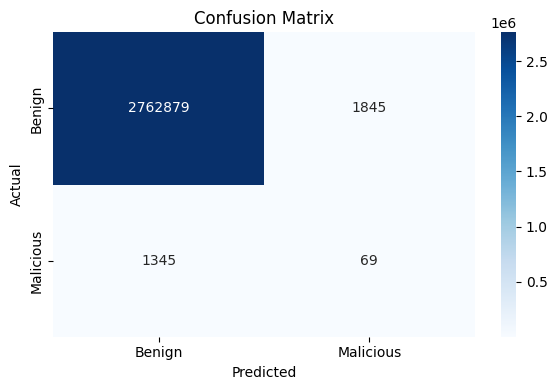

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [18]:
print("CLASSIFICATION REPORT:\n", classification_report(Y_test_new, Y_pred_new, target_names=["Benign", "Malicious"]))

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00   2764724
   Malicious       0.04      0.05      0.04      1414

    accuracy                           1.00   2766138
   macro avg       0.52      0.52      0.52   2766138
weighted avg       1.00      1.00      1.00   2766138



In [19]:
import numpy as np

false_positives = np.sum((Y_pred_new == 1) & (Y_test_new == 0))
false_negatives = np.sum((Y_pred_new == 0) & (Y_test_new == 1))
true_positives = np.sum((Y_pred_new == 1) & (Y_test_new == 1))
true_negatives = np.sum((Y_pred_new == 0) & (Y_test_new == 0))

print("True Positives:", true_positives)
print("True Negatives:", true_negatives)
print("False Positives:", false_positives)
print("False Negatives:", false_negatives)

True Positives: 69
True Negatives: 2762879
False Positives: 1845
False Negatives: 1345
